<a href="https://colab.research.google.com/github/Nailloon/Machine-Learning-Practice/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B%20%D0%AE%D0%B4%D0%B8%D0%BD%D1%86%D0%B5%D0%B2%D0%BE%D0%B9%20%D0%9D%D0%B0%D0%B4%D0%B5%D0%B6%D0%B4%D1%8B/%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Задание 1

In [ ]:
from scipy import signal
import numpy as np
from google.colab import drive
import tensorflow as tf

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/data3",
    validation_split=0.2,
    subset="both",
    seed=42,
    image_size=(100,100),
    batch_size=32
)

Found 1999 files belonging to 2 classes.
Using 1600 files for training.
Using 399 files for validation.


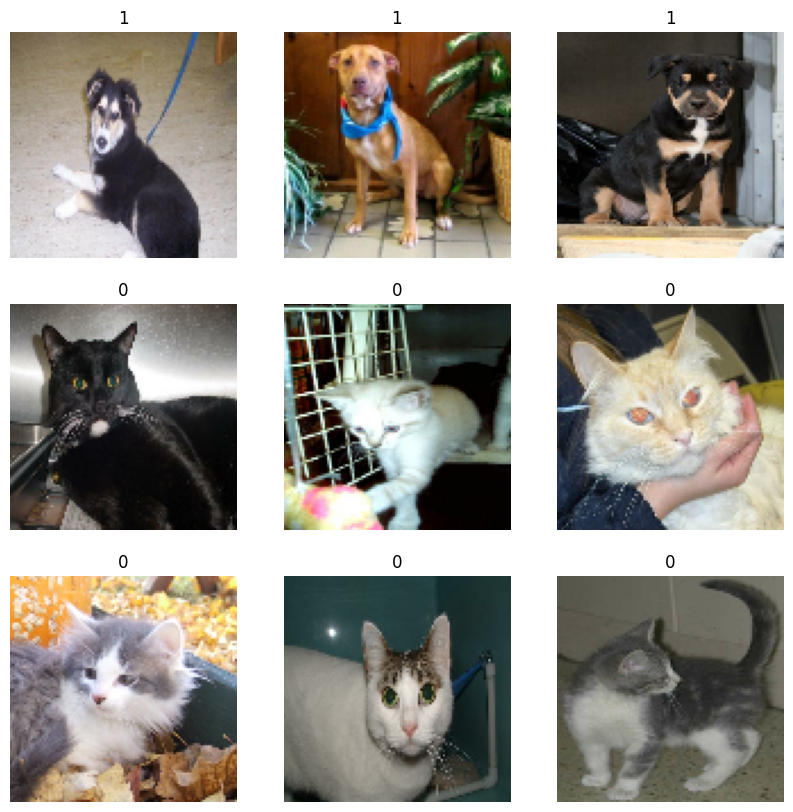

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds.take(1):
    # отрисуем 9 картинок из батча
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

In [ ]:
train_ds = train_ds.map(lambda img, label: (data_augmentation(img), label))

In [ ]:
inputs = tf.keras.Input(shape=(100, 100, 3))
# преобразуем значения пикселей из [0, 255] к [0, 1]
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
# первый сверточный слой
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same")(x)
# первый пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# второй сверточный слой
x = tf.keras.layers.Conv2D(128, 4, strides=2, padding="same")(x)
# второй пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# выпрямляем многомерный массив
x = tf.keras.layers.Flatten()(x)
# полносвязный слой с 64 нейронами
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
# выходной слой с функцией sofrmax
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       131200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                         

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
50/50 [==============================] - 124s 2s/step - loss: 0.6958 - accuracy: 0.5525 - val_loss: 0.6442 - val_accuracy: 0.6491
Epoch 2/10
50/50 [==============================] - 19s 370ms/step - loss: 0.6493 - accuracy: 0.6250 - val_loss: 0.6083 - val_accuracy: 0.6867
Epoch 3/10
50/50 [==============================] - 20s 390ms/step - loss: 0.6300 - accuracy: 0.6413 - val_loss: 0.5965 - val_accuracy: 0.6992
Epoch 4/10
50/50 [==============================] - 19s 363ms/step - loss: 0.5934 - accuracy: 0.6988 - val_loss: 0.5883 - val_accuracy: 0.7168
Epoch 5/10
50/50 [==============================] - 21s 390ms/step - loss: 0.5920 - accuracy: 0.6963 - val_loss: 0.5902 - val_accuracy: 0.6942
Epoch 6/10
50/50 [==============================] - 20s 399ms/step - loss: 0.5670 - accuracy: 0.6931 - val_loss: 0.5595 - val_accuracy: 0.7243
Epoch 7/10
50/50 [==============================] - 19s 380ms/step - loss: 0.5481 - accuracy: 0.7169 - val_loss: 0.6231 - val_accuracy: 0.6541
E

In [ ]:
img = tf.keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/data3/dogs/4.jpg", target_size=(100, 100)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 173ms/step


array([[0.02522637, 0.9747736 ]], dtype=float32)

##Задание 2

In [ ]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/data4",
    validation_split=0.15,
    subset="both",
    seed=42,
    image_size=(224,224),
    batch_size=32,
)

Found 258 files belonging to 3 classes.
Using 220 files for training.
Using 38 files for validation.


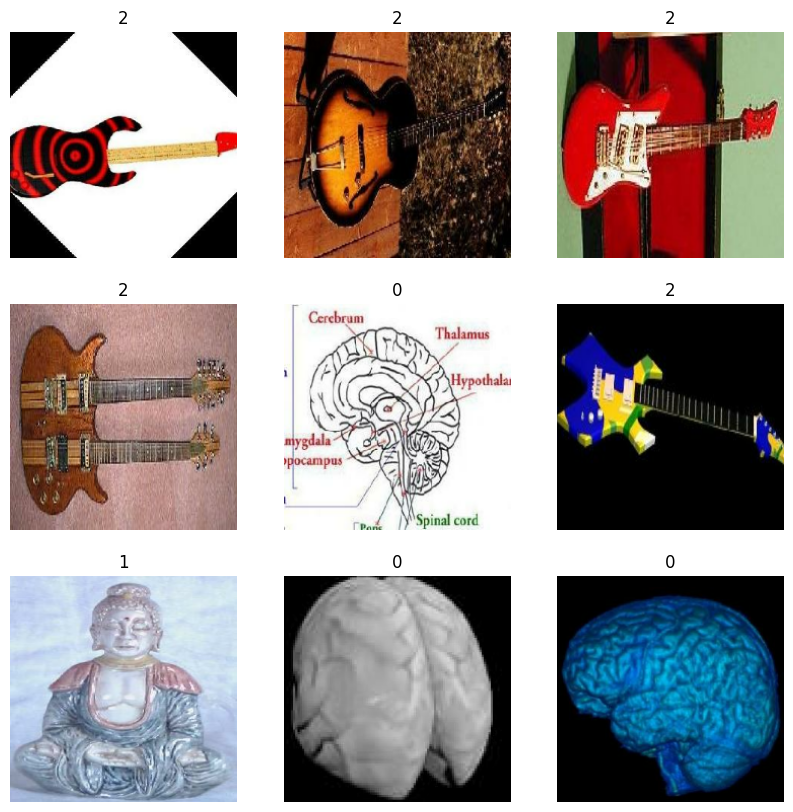

In [ ]:
plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds.take(1):
    # отрисуем 9 картинок из батча
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")

##VGG19

In [ ]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)
vgg.summary()

574710816/574710816 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# сохраним ссылку на входной слой сети
inp = vgg.input

# создадим новый слой классификации по нашему количеству классов
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')

# соединим предпоследний слой VGG и наш новый слой классификации
out = new_classification_layer(vgg.layers[-2].output)

# создадим новую модель
model_new = tf.keras.Model(inp, out)

In [ ]:
model_new.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True
model_new.layers[1].trainable = True

In [ ]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_new.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model_new.fit(train_ds, epochs=3, validation_data=test_ds)

Epoch 1/3
7/7 [==============================] - 483s 69s/step - loss: 1.0064 - accuracy: 0.6864 - val_loss: 0.1224 - val_accuracy: 0.9737
Epoch 2/3
7/7 [==============================] - 457s 66s/step - loss: 0.0196 - accuracy: 0.9909 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 3/3
7/7 [==============================] - 469s 68s/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000


In [ ]:
img = tf.keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/data4/buddha/image_0012.jpg", target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new.predict(img_array)
predictions

1/1 [==============================] - 1s 903ms/step


array([[6.6227188e-09, 1.0000000e+00, 2.6280896e-11]], dtype=float32)

##InceptionV3

In [ ]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/data4",
    validation_split=0.15,
    subset="both",
    seed=42,
    image_size=(299,299),
    batch_size=32
)

Found 258 files belonging to 3 classes.
Using 220 files for training.
Using 38 files for validation.


In [ ]:
inc = tf.keras.applications.InceptionV3(weights='imagenet', include_top=True)
inc.summary()

96112376/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_2[0][0]']               
 alization)           

In [ ]:

inp = inc.input

new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')

out = new_classification_layer(inc.layers[-2].output)

model_new1 = tf.keras.Model(inp, out)

In [ ]:
for layer in model_new1.layers:
    layer.trainable = False
model_new1.layers[-1].trainable = True
model_new1.layers[2].trainable = True

In [ ]:
model_new1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_2[0][0]']               
 alization)                     )                                                           

In [ ]:
model_new1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_new1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_2[0][0]']               
 alization)                     )                                                           

In [ ]:
model_new1.fit(train_ds, epochs=3, validation_data=test_ds)

Epoch 1/3
7/7 [==============================] - 180s 25s/step - loss: 0.7896 - accuracy: 0.7045 - val_loss: 1.0995 - val_accuracy: 0.3947
Epoch 2/3
7/7 [==============================] - 169s 24s/step - loss: 0.2724 - accuracy: 0.9773 - val_loss: 0.8210 - val_accuracy: 0.6579
Epoch 3/3
7/7 [==============================] - 173s 25s/step - loss: 0.1150 - accuracy: 0.9955 - val_loss: 0.5835 - val_accuracy: 0.7368


In [ ]:
img = tf.keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/data4/buddha/image_0012.jpg", target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new1.predict(img_array)
predictions

1/1 [==============================] - 2s 2s/step


array([[0.06636581, 0.7516561 , 0.18197805]], dtype=float32)

##Сверточный слой

In [ ]:
def rotate(matrix):
    N = len(matrix)
    for i in range(N // 2):
        for j in range(N):
            temp = matrix[i][j]
            matrix[i][j] = matrix[N - i - 1][N - j - 1]
            matrix[N - i - 1][N - j - 1] = temp
    return matrix

def valid(x, kernel):
    kernel = rotate(kernel)
    n1, n2 = x.shape
    m1, m2 = kernel.shape
    Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
    for i in range(n1):
        for j in range(n2):
          Y[i:i+m1,j:j+m2] += x[i,j]*kernel
    ret = Y[m1-1:-m1+1,m2-1:-m2+1]
    return ret


In [ ]:
def full(x, kernel):
    kernel = rotate(kernel)
    n1, n2 = x.shape
    m1, m2 = kernel.shape
    Y = np.zeros((n1 + 1, n2 + 1))
    for i in range(n1):
        for j in range(n2):
          Y[i:i+m1,j:j+m2] += x[i,j]*kernel
    return Y

In [ ]:
def same(x, kernel):
    kernel = rotate(kernel)
    n1, n2 = x.shape
    m1, m2 = kernel.shape
    Y = np.zeros((n1 + m1, n2 + m1))
    for i in range(n1):
        for j in range(n2):
          Y[i:i+m1,j:j+m2] += x[i,j]*kernel
    ret = Y[m1-1:-m1+1,m2-1:-m2+1]
    return ret

In [ ]:
a = np.array([
    [4, 2, 1, 5],
    [7, 3, 2, 1],
    [5, 3, 9, 4],
    [6, 6, 8, 8]
])
kernel = np.array([
    [-0.4, 3.4],
    [2, -5]
])

In [ ]:
valid(a, kernel)

array([[  6.6,   1.4,  11.4],
       [-13.2,  -4.4,  21. ],
       [ -1. ,  20.2, -13. ]])

In [ ]:
full(a, kernel)

array([[ -1.6,  12.8,   6.4,   1.4,  17. ],
       [  5.2,   6.6,   1.4,  11.4, -21.6],
       [ 12. , -13.2,  -4.4,  21. ,   8.6],
       [  7.6,  -1. ,  20.2, -13. ,   7.2],
       [ 12. , -18. , -14. , -24. , -40. ]])

In [ ]:
same(a, kernel)

array([[  6.6,   1.4,  11.4, -21.6],
       [-13.2,  -4.4,  21. ,   8.6],
       [ -1. ,  20.2, -13. ,   7.2],
       [-18. , -14. , -24. , -40. ]])

In [ ]:
from scipy import signal

In [ ]:
signal.correlate2d(a, kernel, "valid"), signal.correlate2d(a, kernel, "full"), signal.correlate2d(a, kernel, "same")

(array([[  6.6,   1.4,  11.4],
        [-13.2,  -4.4,  21. ],
        [ -1. ,  20.2, -13. ]]),
 array([[ -1.6,  12.8,   6.4,   1.4,  17. ],
        [  5.2,   6.6,   1.4,  11.4, -21.6],
        [ 12. , -13.2,  -4.4,  21. ,   8.6],
        [  7.6,  -1. ,  20.2, -13. ,   7.2],
        [ 12. , -18. , -14. , -24. , -40. ]]),
 array([[  6.6,   1.4,  11.4, -21.6],
        [-13.2,  -4.4,  21. ,   8.6],
        [ -1. ,  20.2, -13. ,   7.2],
        [-18. , -14. , -24. , -40. ]]))